Importing relevant libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!mkdir data/
!wget https://raw.githubusercontent.com/ayushtiw/hdpe/main/hdpe_data.csv

--2024-04-25 19:03:43--  https://raw.githubusercontent.com/ayushtiw/hdpe/main/hdpe_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 128278 (125K) [text/plain]
Saving to: ‘hdpe_data.csv’

hdpe_data.csv       100%[===================>] 125.27K  --.-KB/s    in 0.02s   

2024-04-25 19:03:43 (5.73 MB/s) - ‘hdpe_data.csv’ saved [128278/128278]



In [ ]:
df = pd.read_csv('/content/hdpe_data.csv')
df.head()

,Temperature (°C),Pressure (atm),Catalyst Conc. (%),Co-monomer Conc. (%),Ethylene Feed Rate (mol/hr),Catalyst Activity (units),HDPE Yield (%)
0,86.720615,171.156526,18.938937,41.566473,103.054721,65.706800,84.826786
1,91.758653,132.894252,18.614070,41.757159,106.064499,70.552799,85.084952
2,88.259225,169.941033,18.782057,41.399630,103.680930,72.562249,84.599784
3,92.608057,156.071152,19.593789,41.166510,109.394346,71.521056,85.110019
4,94.581788,168.994746,19.703108,40.670973,117.917840,72.423638,83.404114


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Temperature (°C)             1000 non-null   float64
 1   Pressure (atm)               1000 non-null   float64
 2   Catalyst Conc. (%)           1000 non-null   float64
 3   Co-monomer Conc. (%)         1000 non-null   float64
 4   Ethylene Feed Rate (mol/hr)  1000 non-null   float64
 5   Catalyst Activity (units)    1000 non-null   float64
 6   HDPE Yield (%)               1000 non-null   float64
dtypes: float64(7)
memory usage: 54.8 KB


Description of the dataset

In [ ]:
df.describe()

,Temperature (°C),Pressure (atm),Catalyst Conc. (%),Co-monomer Conc. (%),Ethylene Feed Rate (mol/hr),Catalyst Activity (units),HDPE Yield (%)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,97.719200,159.788925,19.014865,41.498071,108.180828,69.216466,85.000956
std,10.250363,15.649388,0.823539,0.455750,7.761217,3.044169,0.809403
min,69.947586,103.016453,16.182847,40.143103,82.626193,59.130514,82.531822
25%,90.510544,149.248825,18.488053,41.186894,103.054537,67.277113,84.439141
50%,97.502299,159.504045,19.007367,41.513936,108.058065,69.160443,85.009139
75%,105.048485,170.140720,19.558660,41.809620,113.380495,71.154110,85.543555
max,132.011116,206.124668,21.845737,43.238239,131.926638,79.340311,87.683489


Checking for the null values

In [ ]:
df.isnull().sum()




Temperature (°C)               0
Pressure (atm)                 0
Catalyst Conc. (%)             0
Co-monomer Conc. (%)           0
Ethylene Feed Rate (mol/hr)    0
Catalyst Activity (units)      0
HDPE Yield (%)                 0
dtype: int64

Performing univariate and bivariate analysis on the dataset ( These analyses help in gaining insights into the dataset, identifying patterns, outliers, and relationships between variables, which can be useful for further data preprocessing and model building ).

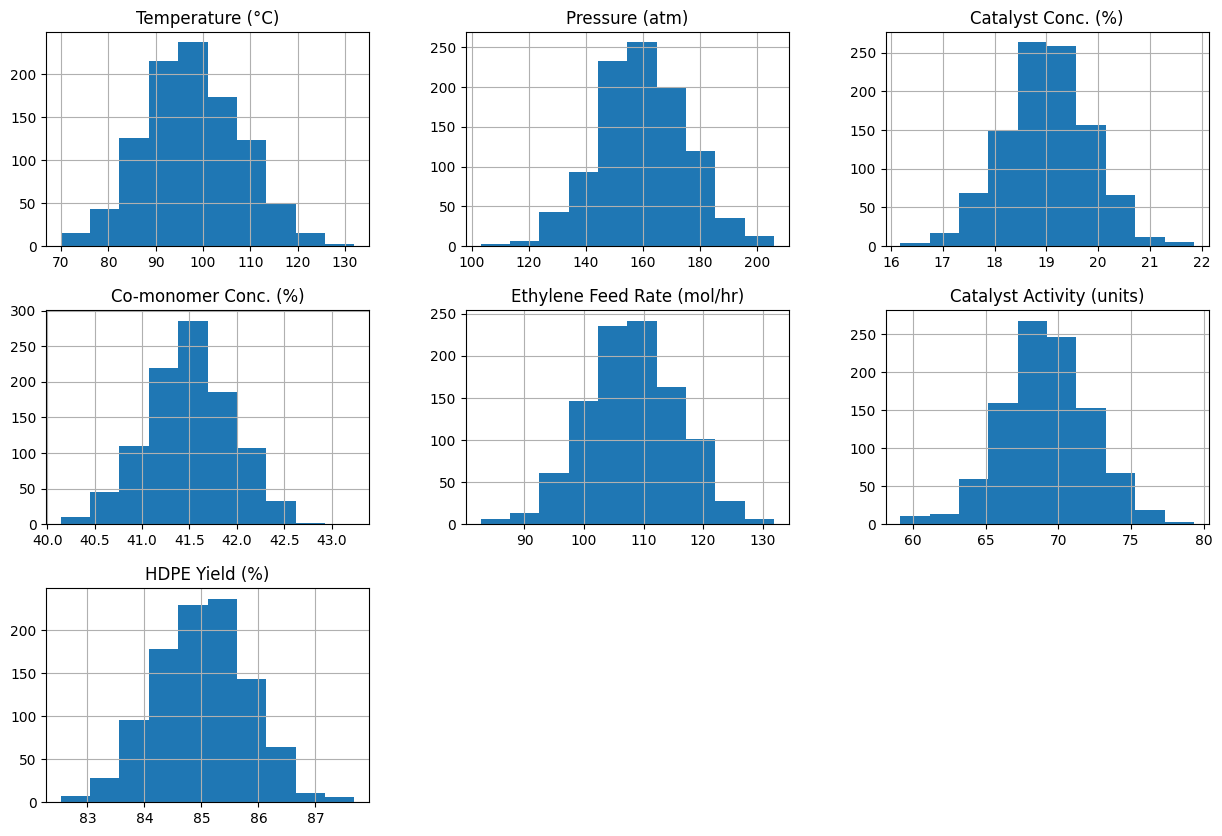

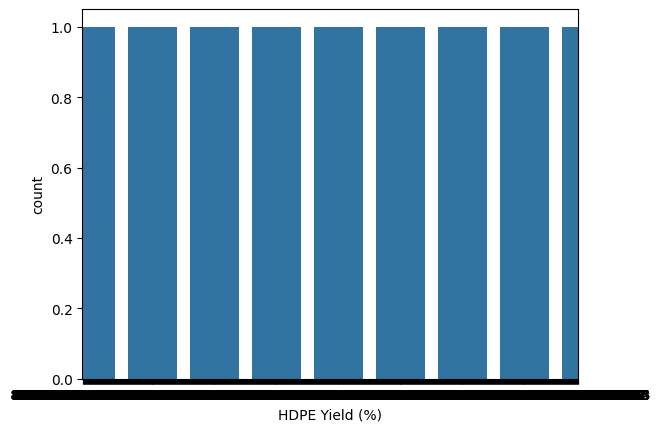

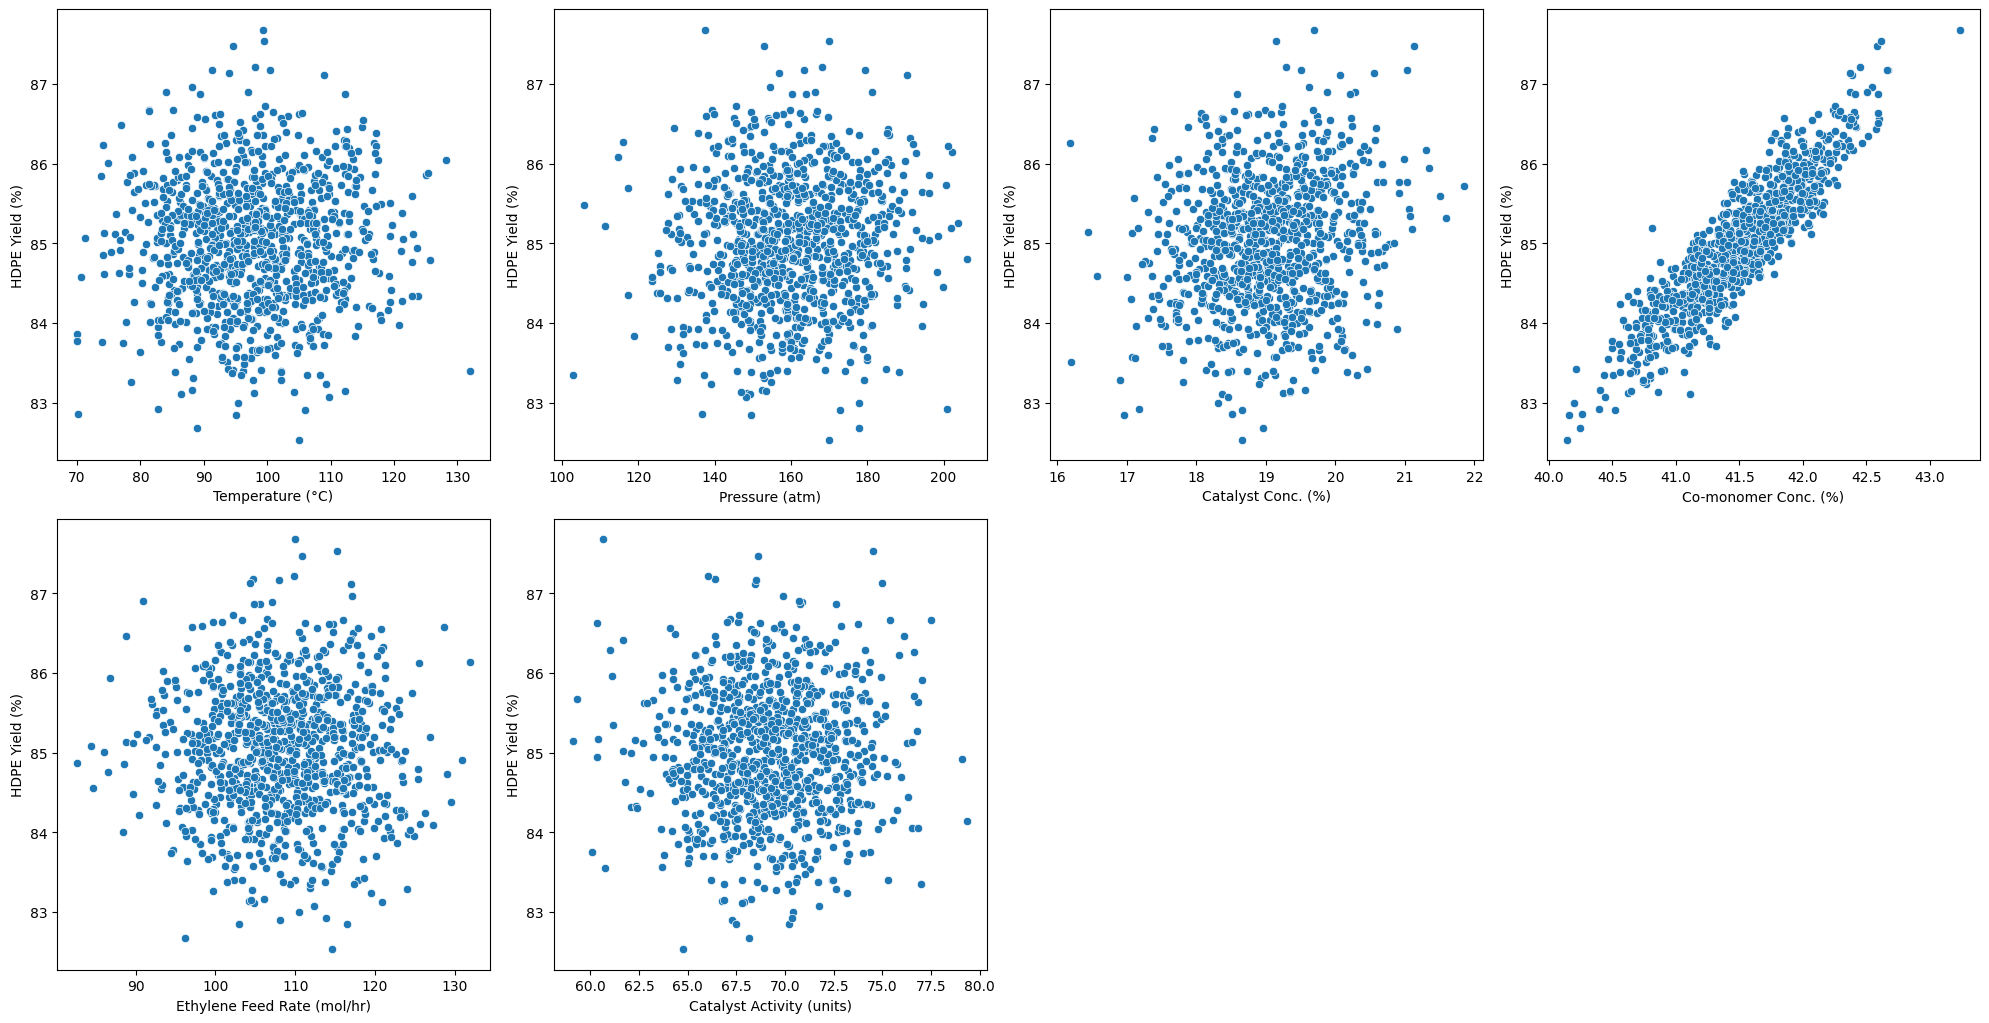

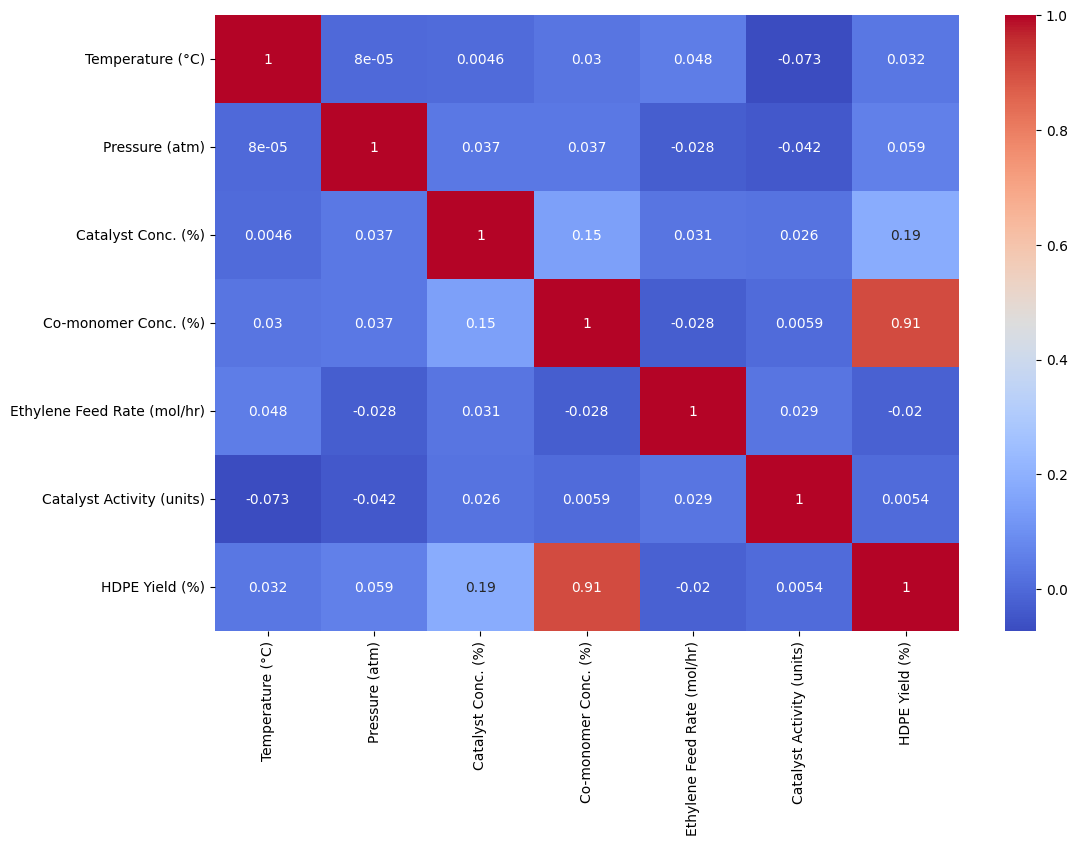

In [ ]:
# Univariate Analysis
# Histograms for each numerical feature
df.hist(figsize=(15, 10))
plt.show()

# Bar plot for 'HDPE yield' distribution
sns.countplot(x='HDPE Yield (%)', data=df)
plt.show()

# Bivariate Analysis
# Scatter plots for relationship between features and 'quality'
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 4, i+1)
    sns.scatterplot(x=col, y='HDPE Yield (%)', data=df)
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

Scaling the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Separate features (X) and target variable (y)
X = df.drop('HDPE Yield (%)', axis=1)
y = df['HDPE Yield (%)']

# Min-max scaling on X
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


# Convert X_scaled back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the scaled features
X_scaled_df.head()

,Temperature (°C),Pressure (atm),Catalyst Conc. (%),Co-monomer Conc. (%),Ethylene Feed Rate (mol/hr),Catalyst Activity (units)
0,0.270256,0.660860,0.486693,0.459873,0.414368,0.325401
1,0.351431,0.289771,0.429326,0.521481,0.475418,0.565186
2,0.295047,0.649071,0.458990,0.405968,0.427070,0.664615
3,0.365117,0.514554,0.602332,0.330650,0.542960,0.613096
4,0.396919,0.639894,0.621637,0.170548,0.715848,0.657756


Splitting the dataset into training and testing sets for model evaluation.

In [ ]:
from sklearn.model_selection import train_test_split

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=17)

# Display the shape of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (700, 6)
X_test shape: (300, 6)
y_train shape: (700,)
y_test shape: (300,)


Training different regression models and evaluating their performance using mean squared error (MSE) and R-squared (R^2) score.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Random Forest
rf_model = RandomForestRegressor(random_state=17)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Decision Tree
dt_model = DecisionTreeRegressor(random_state=17)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

# XGBoost
xgb_model = XGBRegressor(random_state=17)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

# Gradient Boosting Regression
gb_model = GradientBoostingRegressor(random_state=13)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)


# Display results
print("Random Forest - MSE:", rf_mse, "R^2:", rf_r2)
print("Decision Tree - MSE:", dt_mse, "R^2:", dt_r2)
print("XGBoost - MSE:", xgb_mse, "R^2:", xgb_r2)
print("Gradient Boosting - MSE:", gb_mse, "R^2:", gb_r2)


Random Forest - MSE: 0.11746186112255776 R^2: 0.816364376267892
Decision Tree - MSE: 0.24703671461672344 R^2: 0.6137917385283047
XGBoost - MSE: 0.1490482049947972 R^2: 0.7669834290994872
Gradient Boosting - MSE: 0.11973720908246453 R^2: 0.8128071795928871


Plotting predicted values vs actual values for different models mentioned above.

In [ ]:
def plot_predictions(model_name, y_true, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, color='blue', alpha=0.6)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')
    plt.title(f"{model_name} - Actual vs. Predicted")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


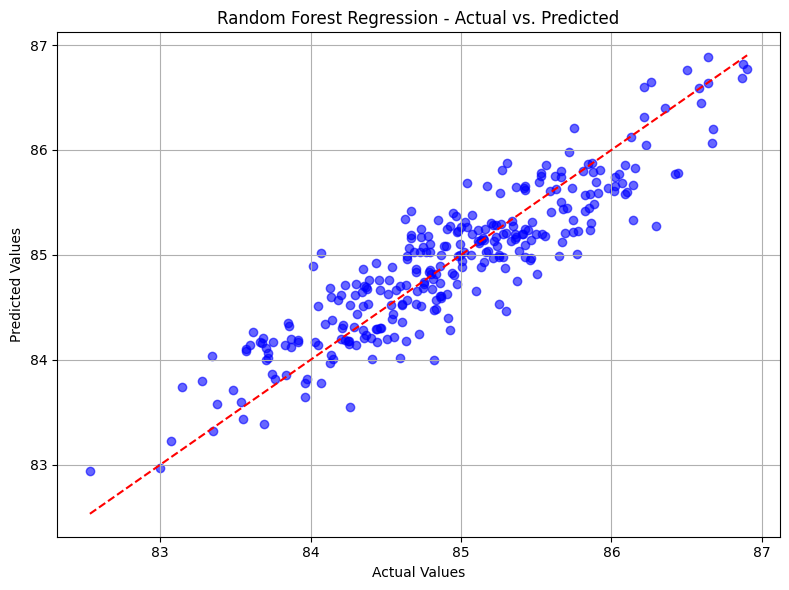

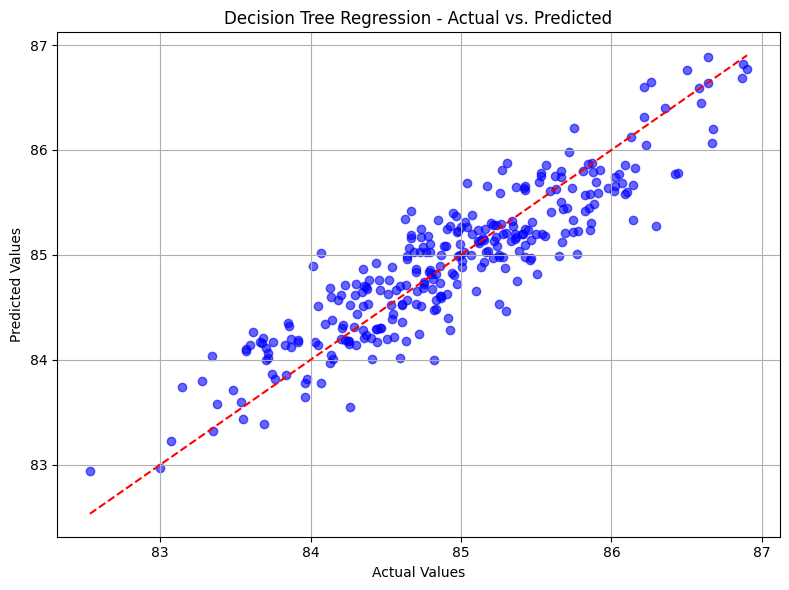

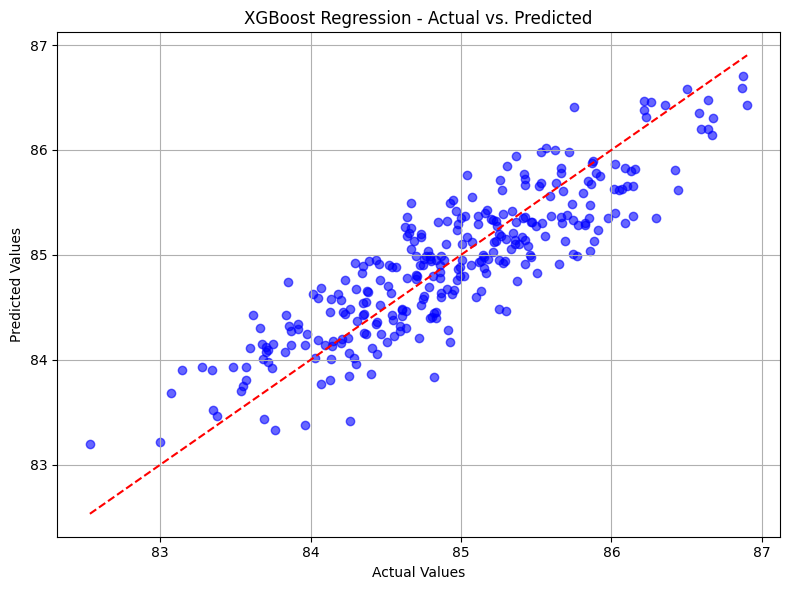

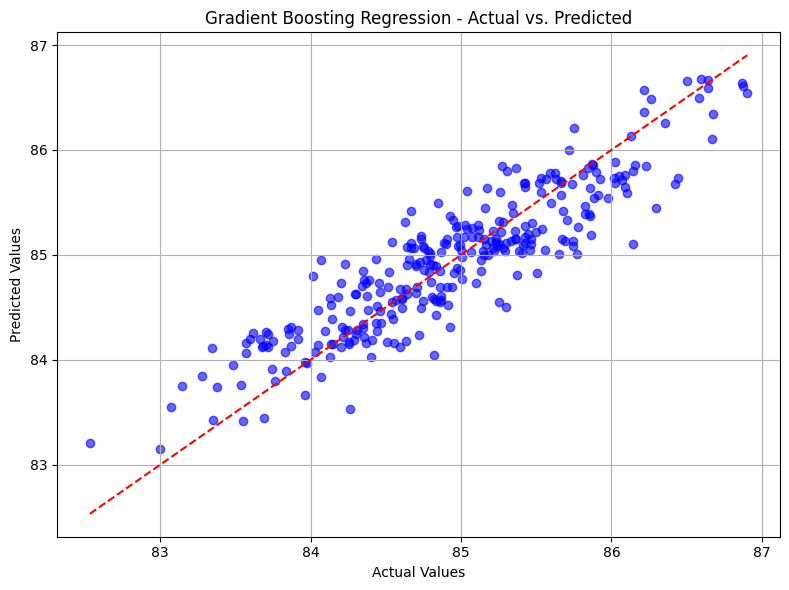

In [ ]:
plot_predictions("Random Forest Regression", y_test,rf_pred )
plot_predictions("Decision Tree Regression", y_test, rf_pred)
plot_predictions("XGBoost Regression", y_test, xgb_pred)
plot_predictions("Gradient Boosting Regression", y_test, gb_pred)



Performing hyperparameter tuning for the Random Forest model using GridSearchCV to improve its performance.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=93), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform the grid search
rf_grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = rf_grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_rf_model = rf_grid_search.best_estimator_

# Evaluate the best model
best_rf_pred = best_rf_model.predict(X_test)
best_rf_mse = mean_squared_error(y_test, best_rf_pred)
best_rf_r2 = r2_score(y_test, best_rf_pred)

print("Best Random Forest - MSE:", best_rf_mse, "R^2:", best_rf_r2)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Random Forest - MSE: 0.1162752004711766 R^2: 0.8182195585950933


Performing hyperparameter tuning for the Random Forest model using GridSearchCV with KFold cross-validation to improve its performance.

In [ ]:
from sklearn.model_selection import KFold

# Define the KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=93)

# Create the GridSearchCV object with KFold
rf_grid_search_cv = GridSearchCV(RandomForestRegressor(random_state=93), param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform the grid search with KFold
rf_grid_search_cv.fit(X_train, y_train)

# Get the best hyperparameters
best_params_cv = rf_grid_search_cv.best_params_
print("Best Hyperparameters with KFold:", best_params_cv)

# Get the best model
best_rf_model_cv = rf_grid_search_cv.best_estimator_

# Evaluate the best model
best_rf_pred_cv = best_rf_model_cv.predict(X_test)
best_rf_mse_cv = mean_squared_error(y_test, best_rf_pred_cv)
best_rf_r2_cv = r2_score(y_test, best_rf_pred_cv)

print("Best Random Forest with KFold - MSE:", best_rf_mse_cv, "R^2:", best_rf_r2_cv)

Best Hyperparameters with KFold: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best Random Forest with KFold - MSE: 0.11601393162671579 R^2: 0.8186280168534233
Best Hyperparameters with KFold: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best Random Forest with KFold - MSE: 0.11601393162671579 R^2: 0.8186280168534233
